## Human Activity Recognition Using Smartphones Data Set



The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

**Attribute Information:**

For each record in the dataset it is provided: 
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who carried out the experiment.



In [0]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
train_data = pd.read_csv("train.csv") 
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [0]:
train_data.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

In [0]:
train_data.shape

(999, 563)

In [0]:
train_data.Activity.value_counts()

WALKING               209
STANDING              179
LAYING                164
WALKING_UPSTAIRS      159
WALKING_DOWNSTAIRS    145
SITTING               143
Name: Activity, dtype: int64

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
test_data = pd.read_csv('test.csv')
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.9682

In [0]:
# suffling data 
from sklearn.utils import shuffle

# test  = shuffle(test)
train_data = shuffle(train_data)

In [0]:
# separating data inputs and output lables 
trainData  = train_data.drop('Activity' , axis=1).values
trainLabel = train_data.Activity.values

testData  = test_data.drop('Activity' , axis=1).values
testLabel = test_data.Activity.values

In [0]:
# encoding labels 
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

# encoding test labels 
encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [0]:
testLabelE

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [0]:
# applying supervised neural network using multi-layer preceptron 
import sklearn.neural_network as nn 
mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='sgd' , verbose=10   \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001)

In [0]:
mlpADAM =  nn.MLPClassifier(hidden_layer_sizes=(90,)  \
                        , max_iter=1000 , alpha=1e-4  \
                        , solver='adam' , verbose=10  \
                        , tol=1e-19 , random_state=1  \
                        , learning_rate_init=.001) 

In [0]:
nnModelSGD  = mlpSGD.fit(trainData , trainLabelE)

Iteration 1, loss = 2.15762479
Iteration 2, loss = 1.88494594
Iteration 3, loss = 1.66996618
Iteration 4, loss = 1.51369497
Iteration 5, loss = 1.37052329
Iteration 6, loss = 1.27950919
Iteration 7, loss = 1.20883312
Iteration 8, loss = 1.14492271
Iteration 9, loss = 1.09076795
Iteration 10, loss = 1.04116027
Iteration 11, loss = 0.99869283
Iteration 12, loss = 0.95993384
Iteration 13, loss = 0.92531073
Iteration 14, loss = 0.89426241
Iteration 15, loss = 0.86586583
Iteration 16, loss = 0.83835620
Iteration 17, loss = 0.81332223
Iteration 18, loss = 0.78997580
Iteration 19, loss = 0.76908341
Iteration 20, loss = 0.74806462
Iteration 21, loss = 0.72907847
Iteration 22, loss = 0.71101675
Iteration 23, loss = 0.69390164
Iteration 24, loss = 0.67761179
Iteration 25, loss = 0.66188420
Iteration 26, loss = 0.64730086
Iteration 27, loss = 0.63413798
Iteration 28, loss = 0.61990897
Iteration 29, loss = 0.60704088
Iteration 30, loss = 0.59425674
Iteration 31, loss = 0.58215160
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
testLabelE = testLabelE.reshape(-1,1)
testLabelE.shape

(999, 1)

In [0]:
y_pred = mlpSGD.predict(testData).reshape(-1,1)
print(y_pred)
# mlpSGD.score(testLabelE, y_pred)

[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [4]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [5]
 [4]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]


In [0]:
nnModelADAM = mlpADAM.fit(trainData , trainLabelE)

Iteration 1, loss = 1.68682167
Iteration 2, loss = 1.12094101
Iteration 3, loss = 0.86627414
Iteration 4, loss = 0.69751733
Iteration 5, loss = 0.58350325
Iteration 6, loss = 0.50600854
Iteration 7, loss = 0.43727530
Iteration 8, loss = 0.38263402
Iteration 9, loss = 0.34783548
Iteration 10, loss = 0.31745899
Iteration 11, loss = 0.28547185
Iteration 12, loss = 0.25541582
Iteration 13, loss = 0.23256052
Iteration 14, loss = 0.21294181
Iteration 15, loss = 0.19800025
Iteration 16, loss = 0.18128752
Iteration 17, loss = 0.16749298
Iteration 18, loss = 0.15806270
Iteration 19, loss = 0.14728296
Iteration 20, loss = 0.13821159
Iteration 21, loss = 0.13047290
Iteration 22, loss = 0.12374392
Iteration 23, loss = 0.11538090
Iteration 24, loss = 0.10890759
Iteration 25, loss = 0.10275752
Iteration 26, loss = 0.10075382
Iteration 27, loss = 0.10120093
Iteration 28, loss = 0.10822445
Iteration 29, loss = 0.08849021
Iteration 30, loss = 0.08425330
Iteration 31, loss = 0.07807024
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print('Train Data', train.shape,'\n', train.columns)
print('\nTest Data', test.shape)

Train Data (999, 563) 
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Test Data (999, 563)


In [0]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())

Train labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS'] 
Test Labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [0]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,0,0,9,0,0,0


In [0]:
sub_01 = train.loc[train['subject']==3]

In [0]:
sub_01.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
347,0.236013,-0.026913,0.186395,-0.854112,-0.795111,-0.605794,-0.909125,-0.790751,-0.563723,-0.682518,-0.440608,-0.296354,0.522457,0.625734,0.856748,-0.698508,-0.988453,-0.991080,-0.798822,-0.955711,-0.809610,-0.517501,-0.332177,-0.197250,0.794146,0.039123,0.060511,0.035715,0.174847,-0.097826,-0.019994,0.250523,-0.167920,0.227065,-0.181316,0.029793,-0.124615,0.192874,-0.157090,0.443116,...,-0.119233,-1.000000,-0.317619,-0.211720,-0.667276,-0.474808,-0.578648,-0.485192,-0.687605,-0.822581,-0.474808,-0.864475,-0.410722,0.531525,-1.000000,0.044365,-0.637074,-0.893069,-0.667564,-0.683894,-0.649924,-0.718766,-0.863082,-0.667564,-0.942862,-0.664166,0.260712,-1.0,-0.024907,-0.302844,-0.673707,0.076072,-0.489161,-0.254101,0.084231,-0.750788,0.268367,0.044542,3,STANDING
348,0.267318,-0.032355,-0.062924,-0.963742,-0.865102,-0.868472,-0.975781,-0.861588,-0.863451,-0.887808,-0.507358,-0.680366,0.747702,0.626088,0.838267,-0.917814,-0.999169,-0.995614,-0.987551,-0.985021,-0.888716,-0.878864,-0.371765,-0.273920,0.018996,0.567729,-0.475897,0.556853,-0.110292,-0.409660,0.364300,-0.285120,0.325902,0.004910,-0.189773,0.447110,-0.449478,0.437632,-0.470675,-0.481446,...,-0.723642,-1.000000,0.248835,-0.340173,-0.714672,-0.895652,-0.829110,-0.846468,-0.806676,-0.952944,-0.895652,-0.985946,-0.945261,-0.186343,-1.000000,-0.485913,0.267625,0.000016,-0.950938,-0.949857,-0.944686,-0.961461,-0.979763,-0.950938,-0.998554,-0.956449,-0.449855,-1.0,-0.141380,-0.305393,-0.740185,-0.028610,-0.307088,-0.406407,0.628807,-0.742844,0.268968,-0.032272,3,STANDING
349,0.283352,-0.010729,-0.117333,-0.993056,-0.965022,-0.990440,-0.994083,-0.969828,-0.990788,-0.933323,-0.548597,-0.820305,0.845053,0.673801,0.838267,-0.984363,-0.999940,-0.999559,-0.999709,-0.996028,-0.981837,-0.990183,-0.445890,-0.284591,-0.745081,0.343584,-0.153604,0.247210,-0.379082,0.080578,-0.158087,0.270905,-0.026389,-0.039032,0.090658,0.051433,-0.154612,0.009741,-0.280215,0.228574,...,-1.000000,-1.000000,0.296938,-0.494972,-0.794995,-0.973184,-0.967916,-0.963127,-0.977943,-0.988904,-0.973184,-0.999332,-0.972542,-0.5372

In [0]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [0]:
train.subject.value_counts()

1    347
3    341
5    302
6      9
Name: subject, dtype: int64

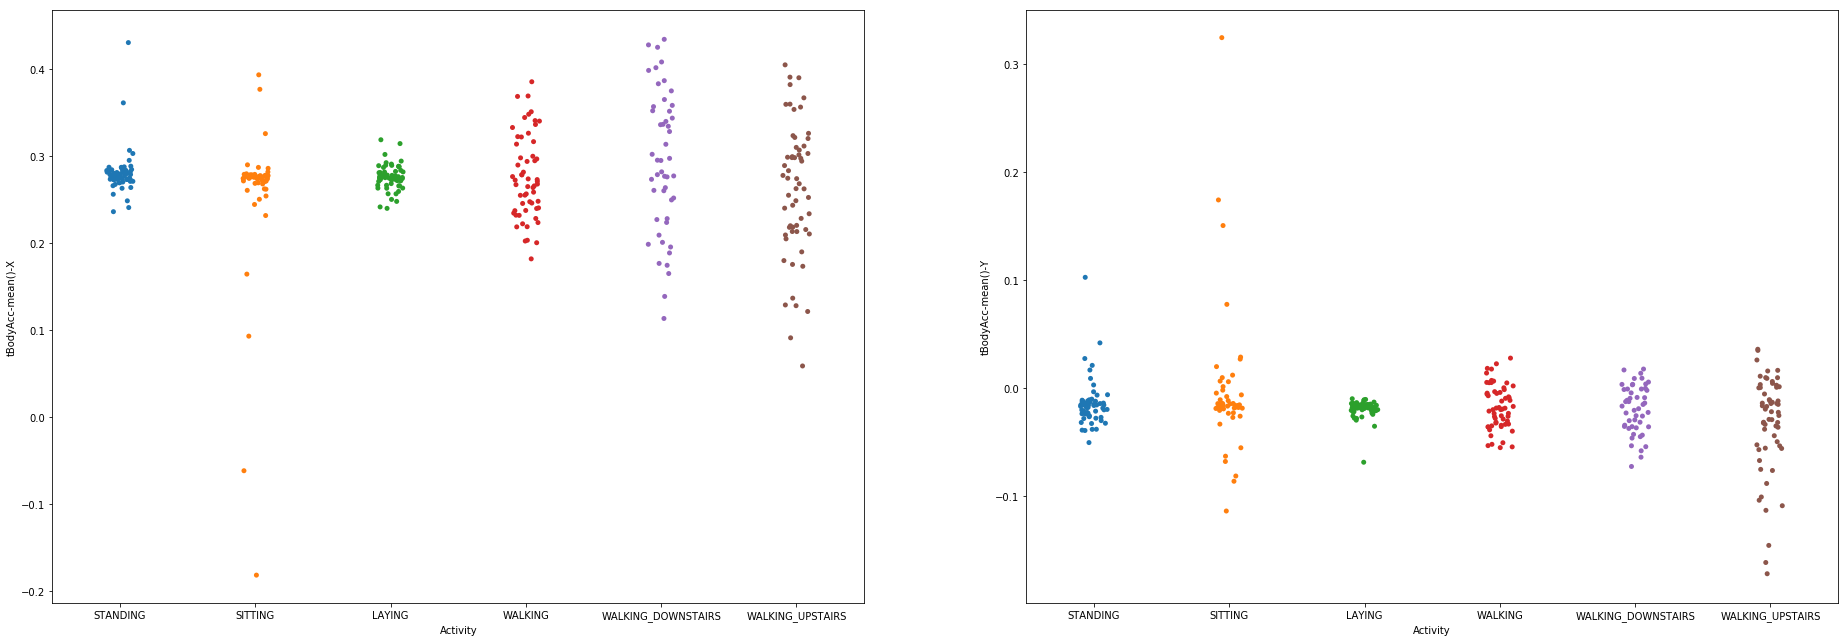

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub_01.iloc[:,0], data=sub_01, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub_01.iloc[:,1], data=sub_01, jitter=True)
plt.show()

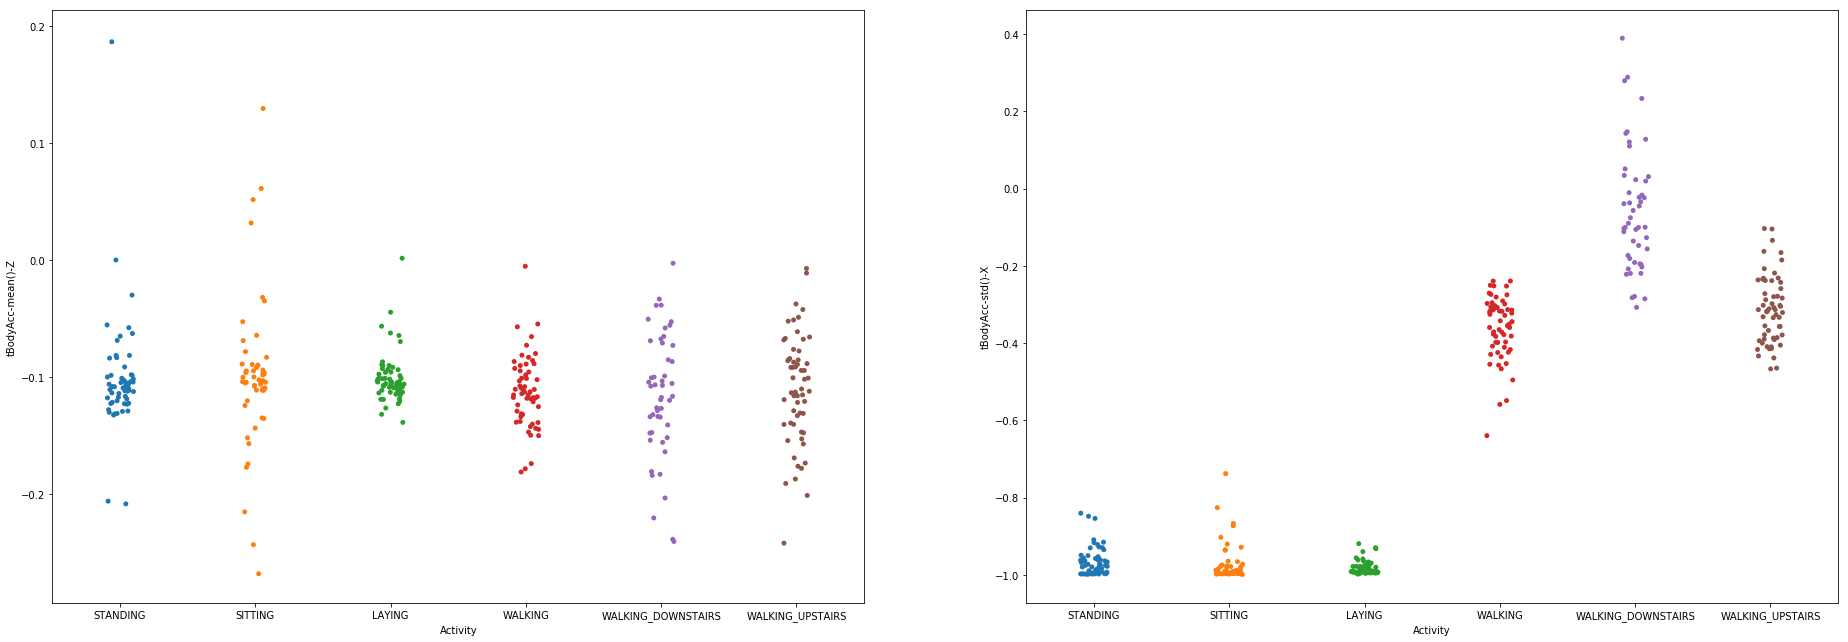

In [0]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub_01.iloc[:,2], data=sub_01, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub_01.iloc[:,3], data=sub_01, jitter=True)
plt.show()

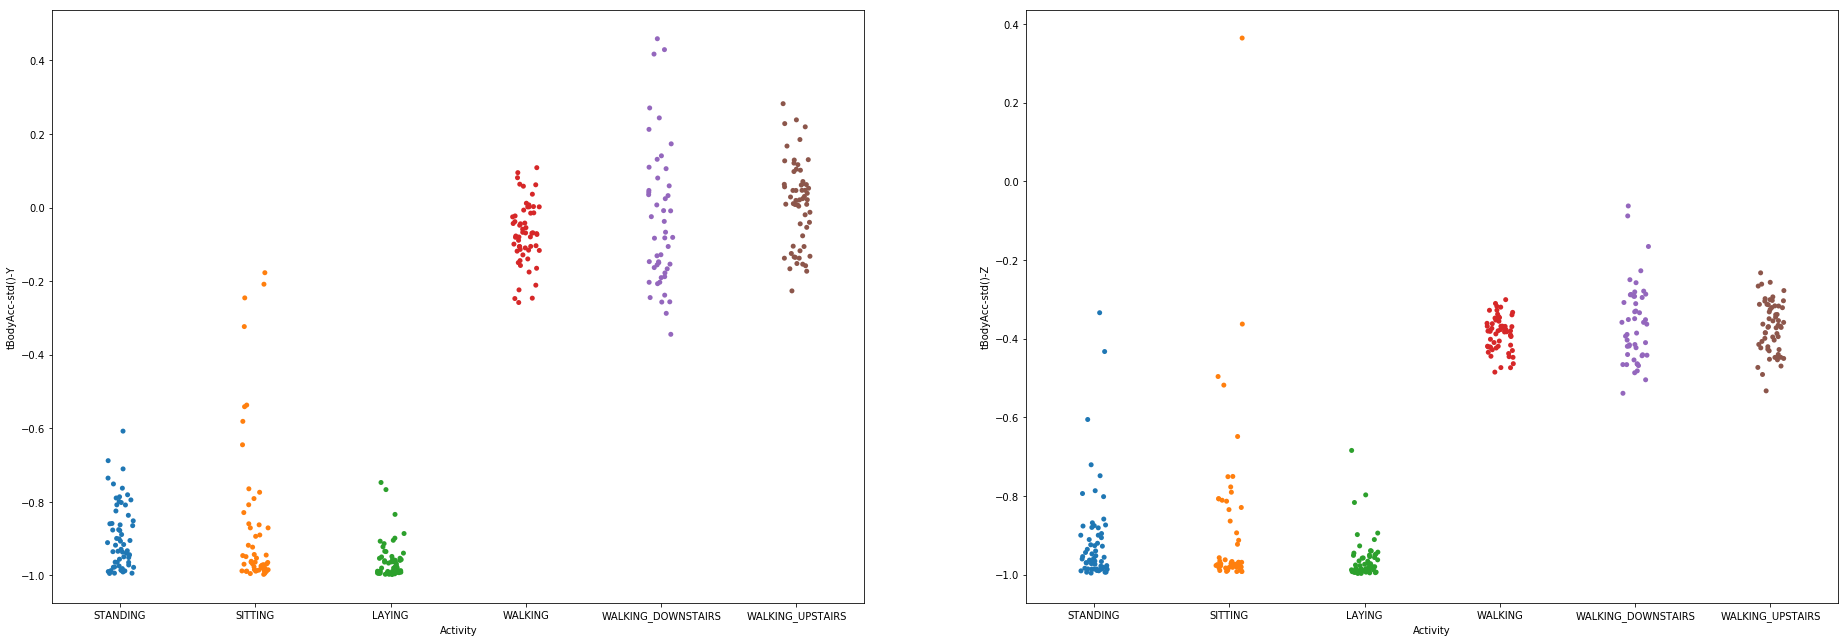

In [0]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub_01.iloc[:,4], data=sub_01, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub_01.iloc[:,5], data=sub_01, jitter=True)
plt.show()

In [0]:
train_df = train
test_df = test

In [0]:
unique_activities = train_df.Activity.unique()
print("NUmber of unique activities: {}".format(len(unique_activities)))
replacer = {}
for i, activity in enumerate(unique_activities):
    replacer[activity] = i
train_df.Activity = train_df.Activity.replace(replacer)
test_df.Activity = test_df.Activity.replace(replacer)
train_df.head(10)

NUmber of unique activities: 6


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212

In [0]:
train_df = train_df.drop("subject", axis=1)
test_df = test_df.drop("subject", axis=1)

In [0]:
def get_all_data():
    train_values = train_df.values
    test_values = test_df.values
    np.random.shuffle(train_values)
    np.random.shuffle(test_values)
    X_train = train_values[:, :-1]
    X_test = test_values[:, :-1]
    y_train = train_values[:, -1]
    y_test = test_values[:, -1]
    return X_train, X_test, y_train, y_test

In [0]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = get_all_data()

In [0]:
model = LogisticRegression(C=10)
model

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8698698698698699

In [0]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.83       178
         1.0       0.76      0.65      0.70       170
         2.0       1.00      0.98      0.99       183
         3.0       0.94      0.92      0.93       185
         4.0       0.86      0.99      0.92       134
         5.0       0.98      0.70      0.82       149

    accuracy                           0.87       999
   macro avg       0.88      0.87      0.87       999
weighted avg       0.88      0.87      0.87       999



In [0]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8728728728728729

In [0]:
# Try some transformations
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_all_data() #generating the training set
pca = PCA(n_components=200) # initializing the PCA
pca.fit(X_train) #applying PCA
X_train = pca.transform(X_train) # transforming the dataset
X_test = pca.transform(X_test)

model = LogisticRegression(C = 2.0)
model.fit(X_train, y_train) #creating model
model.score(X_test, y_test) #score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8648648648648649

## tasks to do
- Implement Various classification models and compare them 
- Generate final visualization
- Control overfitting ( Max Pooling, Regularization, Cross Validation)
- Use Grid Search for best parameters
- Draw confusion matrix in each model
- Utilize ideas of randomized search to reduce time
- Apart from PCA get a set of features to work with and reduce data dimentionality.
- Target objective is to get higher Accuracy and f-1 score. And avoid overfitting at all costs. Do plot training error vs test error graphs while working with Neural networks.
- Use sklearn pipeline, stratified k-fold
- Submit your code by 6 sept 8:00 am (IST). Max 3 people in a group. Submit it to : amritansh2007@gmail.com
- Write your own code. This code is just to get an idea. !!!!!!!!!!!!!

In [0]:
# Neural Network in Keras


from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
X_train, X_test, y_train, y_test = get_all_data()

n_input = X_train.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples = X_train.shape[0] # number of training samples
n_hidden_units = 40
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(999, 6)
(999, 6)


In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_hidden_units,
                    input_dim=n_input,
                    activation="relu"))
    model.add(Dense(n_output, activation="softmax"))
    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [0]:
estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(X_train, Y_train)
print("Score: {}".format(estimator.score(X_test, Y_test)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Score: 0.8868868787128765


In [1]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_all_data()


model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\pallaw\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'get_all_data' is not defined

In [0]:
np.argsort(model.feature_importances_)

array([308, 485, 327, 447,  26, 341,  31, 431, 413, 440, 245, 326, 465,
       322, 519, 524, 365, 313, 464, 309, 246, 540, 492, 115, 292, 531,
       473, 533, 211, 481, 555, 240, 371, 286, 333, 106, 494, 406, 277,
       528, 499, 495,  80, 114, 526, 238, 135, 416, 506, 436, 435, 511,
        36, 480, 323, 335, 475, 548, 501,  81, 256, 380, 133,  24, 113,
       399, 471,   5, 154, 401, 493, 357, 320,  33,  10, 306, 155, 235,
       334, 230, 545, 379, 239, 424, 430, 463, 337, 247, 486, 527, 225,
       467, 388, 290, 498, 208, 278, 356, 224, 437,  14, 329, 220, 124,
       221, 414,  91, 491,  82, 267, 321, 340, 141, 443, 554, 358, 127,
       534,  34, 385, 118, 535, 263, 428, 242, 161, 368, 105, 237, 420,
       272, 195,  30, 212, 478,  27, 466, 396, 422, 194, 530, 370, 342,
       550, 412, 446, 496, 244, 140, 484, 266, 434, 193, 453, 279,   8,
       536,  21,   0, 128, 111, 151, 112, 183, 146, 236, 289,  35,  90,
       273, 415, 336, 110, 319, 479, 556, 182, 131, 153, 174, 10

In [0]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,Adam

In [0]:
#Feature matrix
train_data = train.iloc[:,:561].as_matrix()
test_data = test.iloc[:,:561].as_matrix()

train_labels = train.iloc[:,562:].as_matrix()
test_labels = test.iloc[:,562:].as_matrix()

train_labelss=np.zeros((len(train_labels),6))
test_labelss=np.zeros((len(test_labels),6))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [0]:
print(test_labelss.shape)

(999, 6)


In [0]:
for k in range (0,len(train_labels)):
    if train_labels[k] =='STANDING':
        train_labelss[k][0]=1
    elif train_labels[k] =='WALKING':
        train_labelss[k][1]=1
    elif train_labels[k] =='WALKING_UPSTAIRS':
        train_labelss[k][2]=1
    elif train_labels[k] =='WALKING_DOWNSTAIRS':
        train_labelss[k][3]=1
    elif train_labels[k] =='SITTING':
        train_labelss[k][4]=1
    else:
        train_labelss[k][5]=1

for k in range (0,len(test_labels)):
    if test_labels[k] =='STANDING':
        test_labelss[k][0]=1
    elif test_labels[k] =='WALKING':
        test_labelss[k][1]=1
    elif test_labels[k] =='WALKING_UPSTAIRS':
        test_labelss[k][2]=1
    elif test_labels[k] =='WALKING_DOWNSTAIRS':
        test_labelss[k][3]=1
    elif test_labels[k] =='SITTING':
        test_labelss[k][4]=1
    else:
        test_labelss[k][5]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=561))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(train_data, train_labelss,nb_epoch=30,batch_size=128)
score = model.evaluate(test_data, test_labelss, batch_size=128)
print(score)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30
999/999 [==============================] - 0s 296us/step - loss: 0.8153 - acc: 0.7417
Epoch 2/30
999/999 [==============================] - 0s 50us/step - loss: 0.0151 - acc: 0.9980
Epoch 3/30
999/999 [==============================] - 0s 48us/step - loss: 0.0027 - acc: 1.0000
Epoch 4/30
999/999 [==============================] - 0s 50us/step - loss: 0.0011 - acc: 1.0000
Epoch 5/30
999/999 [==============================] - 0s 45us/step - loss: 5.0058e-04 - acc: 1.0000
Epoch 6/30
999/999 [==============================] - 0s 48us/step - loss: 3.4689e-04 - acc: 1.0000
Epoch 7/30
999/999 [==============================] - 0s 48us/step - loss: 0.0011 - acc: 0.9990
Epoch 8/30
999/999 [==============================] - 0s 49us/step - loss: 2.6977e-04 - acc: 1.0000
Epoch 9/30
999/999 [==============================] - 0s 51us/step - loss: 1.6006e-04 - acc: 1.0000
Epoch 10/30
999/999 [==============================] - 0s 51us/step - loss: 2.4052e-04 - acc: 1.0000
Epoch 11/30
999/99

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data, train_labelss,nb_epoch=30,batch_size=128)
score = model.evaluate(test_data, test_labelss, batch_size=128)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/30
999/999 [==============================] - 0s 400us/step - loss: 6.5491e-04 - acc: 1.0000
Epoch 2/30
999/999 [==============================] - 0s 49us/step - loss: 2.1146e-04 - acc: 1.0000
Epoch 3/30
999/999 [==============================] - 0s 48us/step - loss: 6.1048e-04 - acc: 1.0000
Epoch 4/30
999/999 [==============================] - 0s 49us/step - loss: 1.0713e-04 - acc: 1.0000
Epoch 5/30
999/999 [==============================] - 0s 48us/step - loss: 1.8978e-06 - acc: 1.0000
Epoch 6/30
999/999 [==============================] - 0s 50us/step - loss: 5.0687e-05 - acc: 1.0000
Epoch 7/30
999/999 [==============================] - 0s 46us/step - loss: 6.6594e-06 - acc: 1.0000
Epoch 8/30
999/999 [==============================] - 0s 46us/step - loss: 5.4246e-07 - acc: 1.0000
Epoch 9/30
999/999 [==============================] - 0s 47us/step - loss: 1.3417e-05 - acc: 1.0000
Epoch 10/30
999/999 [==============================] - 0s 55us/step - loss: 4.4348e-07 - acc: 1.000

In [0]:
trainData  = train.drop('Activity' , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop('Activity' , axis=1).values
testLabel = test.Activity.values

encoder = LabelEncoder()

In [0]:
# encoding test labels 
encoder.fit(testLabel)
testLabelEncoder = encoder.transform(testLabel)

# encoding train labels 
encoder.fit(trainLabel)
trainLabelEncoder = encoder.transform(trainLabel)

rf = RandomForestClassifier(n_estimators=200,  n_jobs=4, min_samples_leaf=10)    
#train
rf.fit(trainData, trainLabelEncoder)

y_te_pred = rf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("Random Forest Accuracy: %.5f" % (acc))

Random Forest Accuracy: 0.89489


In [0]:
##### K-Nearest Neighbors ######
clf = KNeighborsClassifier(n_neighbors=29)

knnModel = clf.fit(trainData , trainLabelEncoder)
y_te_pred = clf.predict(testData)

acc = accuracy_score(testLabelEncoder, y_te_pred)
print("K-Nearest Neighbors Accuracy: %.5f" % (acc))

K-Nearest Neighbors Accuracy: 0.76276


In [0]:
print("Number of features in Train : ", train.shape[1])
print("Number of records  in Train : ",train.shape[0])
print("Number of features in Test  : ",test.shape[1])
print("Number of records  in Test  : ",test.shape[0])

trainData  = train.drop(['subject','Activity'] , axis=1).values
trainLabel = train.Activity.values

testData  = test.drop(['subject','Activity'] , axis=1).values
testLabel = test.Activity.values

print("Train Data shape  : ",trainData.shape)
print("Train Label shape : ",trainLabel.shape)
print("Test Data  shape  : ",testData.shape)
print("Test Label shape  : ",testLabel.shape)

print("Label examples: ")
print(np.unique(trainLabel))

Number of features in Train :  563
Number of records  in Train :  999
Number of features in Test  :  563
Number of records  in Test  :  999
Train Data shape  :  (999, 561)
Train Label shape :  (999,)
Test Data  shape  :  (999, 561)
Test Label shape  :  (999,)
Label examples: 
[0 1 2 3 4 5]


In [0]:
from sklearn import preprocessing
from sklearn import utils

ltrain = preprocessing.LabelEncoder()
ltest = preprocessing.LabelEncoder()

trainLabel = ltrain.fit_transform(trainLabel)
testLabel  = ltest.fit_transform(testLabel)

print(np.unique(trainLabel))
print(np.unique(testLabel))
print("Train Label shape : ",trainLabel.shape)
print("Test Label shape  : ",testLabel.shape)
print(utils.multiclass.type_of_target(testLabel))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
Train Label shape :  (999,)
Test Label shape  :  (999,)
multiclass


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.utils import shuffle

In [0]:
import time
t0 = time.clock()
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(6),
              scoring='accuracy')
# Before training the data it is convenient to shuffle the data in training
np.random.seed(1)
print("Labels before Shuffle",testLabel[0:5])
testData,testLabel = shuffle(testData,testLabel)
trainData,trainLabel = shuffle(trainData,trainLabel)
print("Labels after Shuffle",testLabel[0:5])

Labels before Shuffle [0 0 0 0 0]
Labels after Shuffle [1 5 5 2 3]


In [0]:
# train and fit data in the model
rfecv.fit(trainData, trainLabel)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Processing time sec ",time.clock() - t0)

Optimal number of features : 159
Processing time sec  594.069469


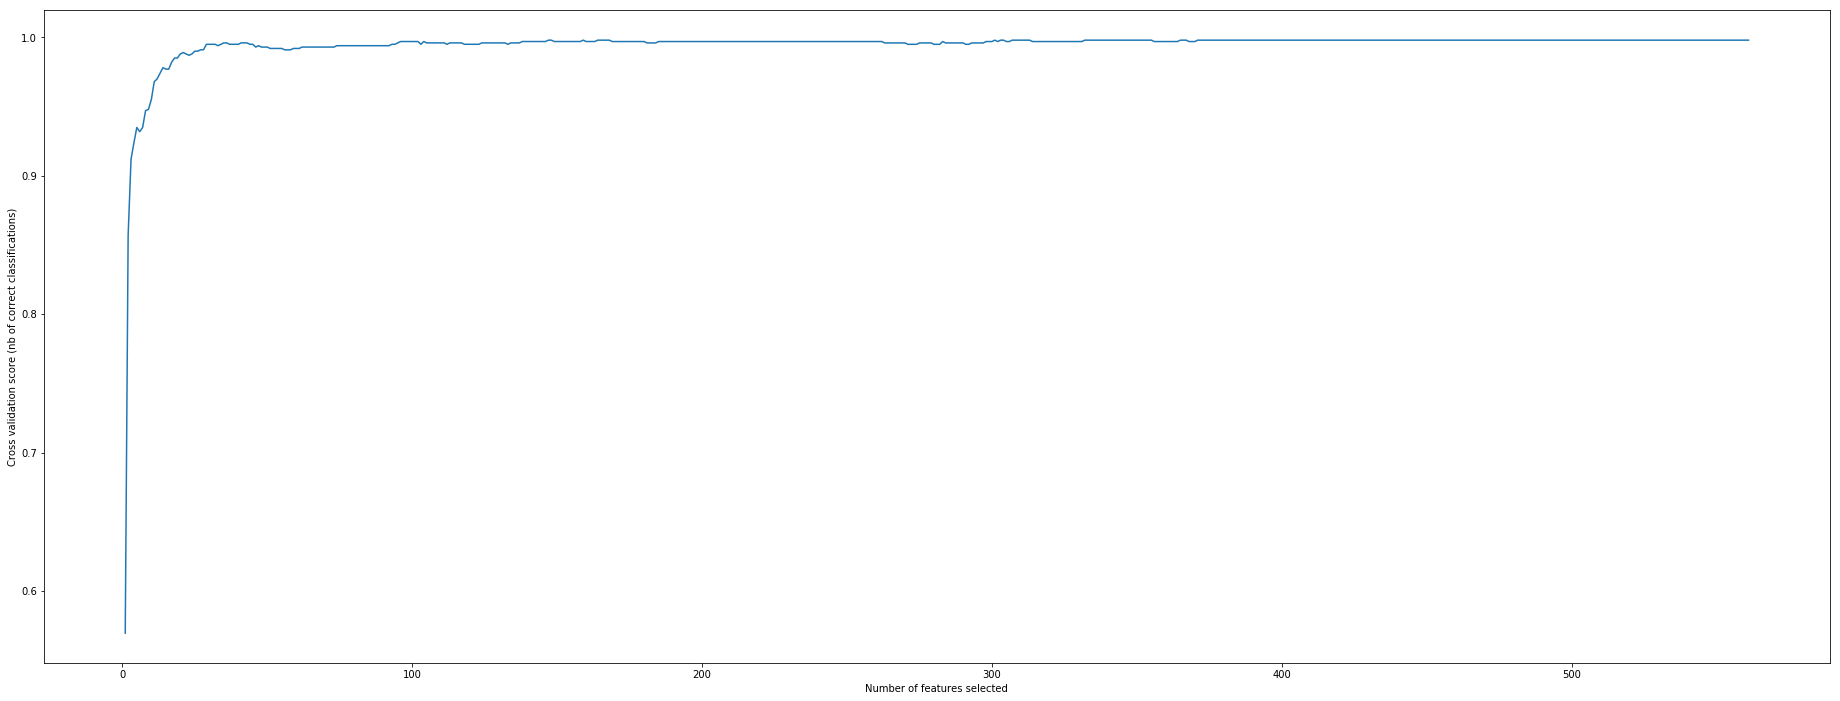

In [0]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(32,12))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
print('Accuracy of the SVM model on test data is ', rfecv.score(testData,testLabel) )
print('Ranking of features starting from the best estimated \n',rfecv.ranking_)
# if we mask the features to get only the best we get this
best_features = []
for ix,val in enumerate(rfecv.support_):
    if val==True:
        best_features.append(testData[:,ix])


Accuracy of the SVM model on test data is  0.8748748748748749
Ranking of features starting from the best estimated 
 [297 354 309   1   1 211   1   1 200   1 241 262 144 151 311 147  83 230
 252 116   1 185   1   1 154 158  93 268   1  46   1   4   1   1 217  35
   1   1   1   1   1   1  95 316 285 165 325 295 146   1   1  68   1   1
 142   1   1   1  25 348 263 107   1   1   1   1   1   1   1   1   1  20
  45   1   1  77  97   1  18  90 273  76   3  70  48 281 112  39 223   1
  30 115  44   1 121 204 247 239 381 166   1 126   1   5   1  82   1   1
   1  99  51  21   1 139  36 220   1   1   1   1 244 119 123 170 210 272
 250 145 180   1 245 215 218 300 153 255 258 321 313 164  52 141   1   1
   1   1  60   1  13  29  89 161   1  31 100 168   1   1   1   1 290 352
  75 150 212 246 172 163 260  98 177   1 182 306 292 271 345 368 379  84
  38 233   1   1   1   1   1  12   1   1 148   1   1   6  69 109   1   1
   1   1 122   1  59   1 156 130 196 238  65   1   1 102 160 135   1  49
   1 17

In [0]:
! pip install pandas.tools

  ERROR: Could not find a version that satisfies the requirement pandas.tools (from versions: none)
ERROR: No matching distribution found for pandas.tools


(999, 159)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f936ed3af98>,
      dtype=object)

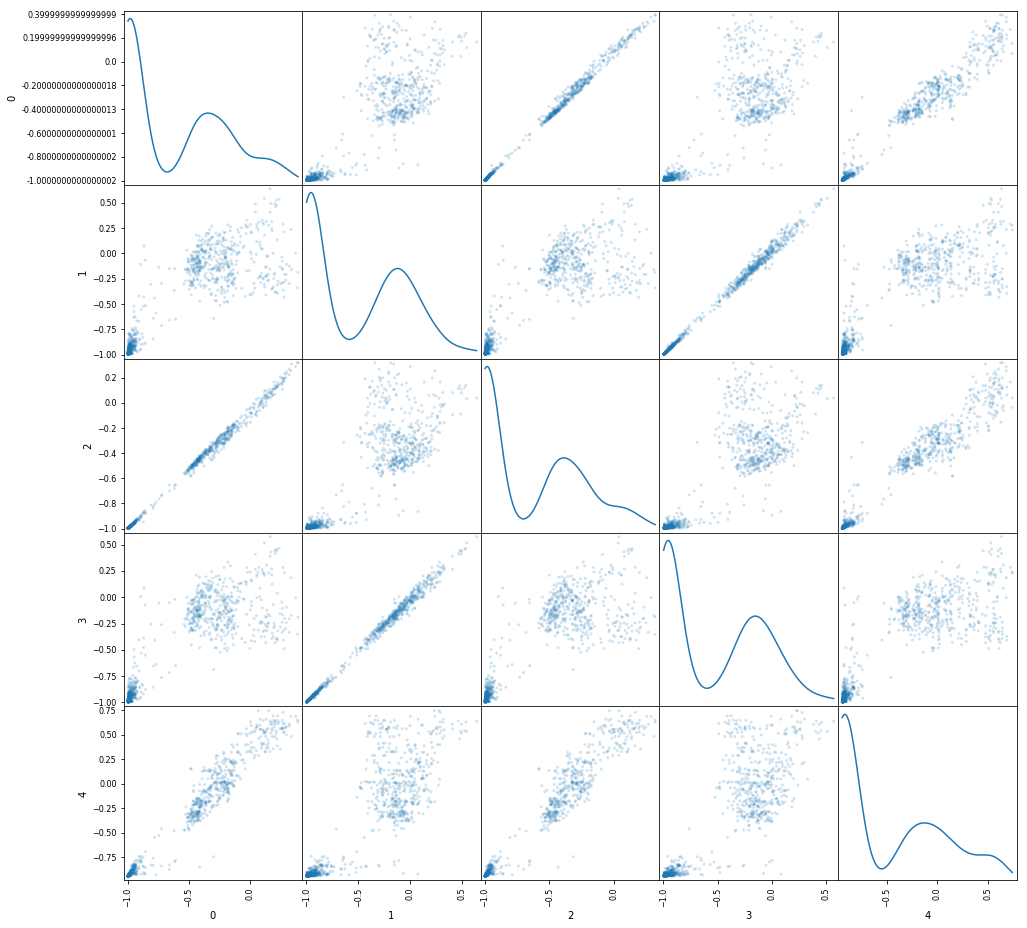

In [0]:
from pandas.plotting import scatter_matrix
visualize = pd.DataFrame(np.asarray(best_features).T)
print(visualize.shape)
scatter_matrix(visualize.iloc[:,0:5], alpha=0.2, figsize=(16, 16), diagonal='kde')

In [0]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

In [0]:
train = shuffle(train)
test = shuffle(test)
train_features = train.iloc[:,:562].as_matrix()
test_features = test.iloc[:,:562].as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
binarizer = LabelBinarizer().fit(train['Activity'])
train_labels = binarizer.transform(train.Activity)
test_labels = binarizer.transform(test.Activity)

In [0]:
def weight_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def bias_variable(shape):
    
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))

def add_layer(inputs, input_size, output_size, activation=None):
    
    W = weight_variable([input_size, output_size])
    b = bias_variable([output_size])
    wxb = tf.matmul(inputs, W) + b
    if activation:
        
        return activation(wxb)
    
    else:
        
        return wxb

In [0]:
X = tf.placeholder(tf.float32, [None, 562])
layer1 = add_layer(X, 562, 1000, tf.nn.relu)
layer2 = add_layer(layer1, 1000, 300, tf.nn.relu)
layer3 = add_layer(layer2, 300, 50, tf.nn.relu)
output = add_layer(layer3, 50, 6)

y_pred = tf.placeholder(tf.float32, [None, 6])

In [0]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=output, logits=y_pred))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train_step = optimizer.minimize(loss)

correct = tf.equal(tf.argmax(output,1), tf.argmax(y_pred,1))
score = tf.reduce_mean(tf.cast(correct, "float"))

In [0]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)
for i in range(10000):
    
    batch = np.random.choice(train_features.shape[0], 100)
    _, cost = sess.run([train_step, loss],  feed_dict = {X:train_features[batch], y_pred:train_labels[batch]})

In [0]:
print(sess.run(score, feed_dict={X: test_features, y_pred: test_labels}))

0.17817818


In [0]:
#seperating class label from the dataset

trainLabels= train.Activity.values
trainData=train.drop("Activity",axis=1).values

testLabels= test.Activity.values
testData=test.drop("Activity",axis=1).values

print("Class labels striped off the dataset")

Class labels striped off the dataset


In [0]:
#transforming non-numerical labels to numerical labels using sklearn.preprocessing.LabelEncoder

from sklearn import preprocessing
labelEncoder= preprocessing.LabelEncoder()

labelEncoder.fit(trainLabels)
trainLabelsE=labelEncoder.transform(trainLabels)

labelEncoder.fit(testLabels)
testLabelsE=labelEncoder.transform(testLabels)

print("Labels Transformed and Encoded")

Labels Transformed and Encoded


In [0]:
#applying k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier as knn
import numpy as np

knnScoreDistance=np.zeros(51)
knnScoreUniform=np.zeros(51)

for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='distance')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreDistance[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Distance(k=%d): %f" %(num,knnScoreDistance[num]))
    
for num in range(5,51):
    knnclf = knn(n_neighbors=num, weights='uniform')
    knnModel = knnclf.fit(trainData , trainLabelsE)
    knnScoreUniform[num]=knnModel.score(testData  , testLabelsE )
    print("Testing  set score for KNN_Uniform(k=%d): %f" %(num,knnScoreUniform[num]))

Testing  set score for KNN_Distance(k=5): 0.767768
Testing  set score for KNN_Distance(k=6): 0.766767
Testing  set score for KNN_Distance(k=7): 0.766767
Testing  set score for KNN_Distance(k=8): 0.768769
Testing  set score for KNN_Distance(k=9): 0.760761
Testing  set score for KNN_Distance(k=10): 0.762763
Testing  set score for KNN_Distance(k=11): 0.767768
Testing  set score for KNN_Distance(k=12): 0.770771
Testing  set score for KNN_Distance(k=13): 0.773774
Testing  set score for KNN_Distance(k=14): 0.765766
Testing  set score for KNN_Distance(k=15): 0.766767
Testing  set score for KNN_Distance(k=16): 0.765766
Testing  set score for KNN_Distance(k=17): 0.766767
Testing  set score for KNN_Distance(k=18): 0.766767
Testing  set score for KNN_Distance(k=19): 0.765766
Testing  set score for KNN_Distance(k=20): 0.764765
Testing  set score for KNN_Distance(k=21): 0.763764
Testing  set score for KNN_Distance(k=22): 0.767768
Testing  set score for KNN_Distance(k=23): 0.766767
Testing  set scor

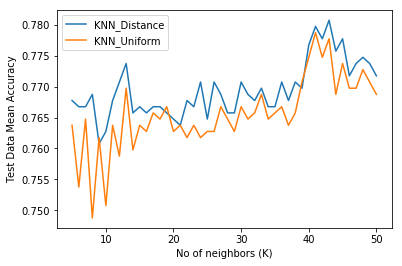

In [0]:
import matplotlib.pyplot as plt

x=np.array(range(5,51))

plt.plot(x,knnScoreDistance[5:])
plt.plot(x,knnScoreUniform[5:])
plt.xlabel("No of neighbors (K)")
plt.ylabel("Test Data Mean Accuracy")
plt.legend(['KNN_Distance','KNN_Uniform'])
plt.show()

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.774775
Confusion matrix, without normalization
[[152  26   0   0   0   0]
 [ 50 120   0   0   0   0]
 [  0   0 183   0   0   0]
 [  0   0   0 126   9  50]
 [  0   0   0  13 118   3]
 [  0   0   0  42  32  75]]


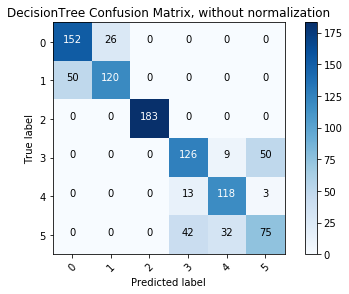

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

decsnTreeClf= DecisionTreeClassifier(criterion='entropy')
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

Accuracy: 0.772773
Confusion matrix, without normalization
[[153  25   0   0   0   0]
 [ 54 116   0   0   0   0]
 [  0   0 183   0   0   0]
 [  0   0   0 136   5  44]
 [  0   0   0  25  96  13]
 [  0   0   0  44  17  88]]


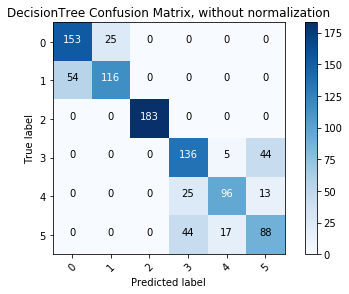

In [0]:
decsnTreeClf= DecisionTreeClassifier()
tree=decsnTreeClf.fit(trainData,trainLabelsE)
testPred=tree.predict(testData)

acc= accuracy_score(testLabelsE,testPred)
cfs = confusion_matrix(testLabelsE, testPred)

print("Accuracy: %f" %acc)

plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names,
                      title='DecisionTree Confusion Matrix, without normalization')

In [0]:
X, y = train_df.iloc[:, 0:len(train_df.columns) - 1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, 0:len(test_df.columns) -1], test_df.iloc[:, -1]

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [0]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(7), # because there are 6 different labels
    SVC(),
    GaussianNB(),
    ]

In [0]:
names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_test))

score_df = pd.DataFrame({'Model': names, 'Score': scores}).set_index('Model')
score_df

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Score
Model,
DecisionTreeClassifier,0.791792
KNeighborsClassifier,0.871872
SVC,0.883884
GaussianNB,0.759760


[Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'GaussianNB')]

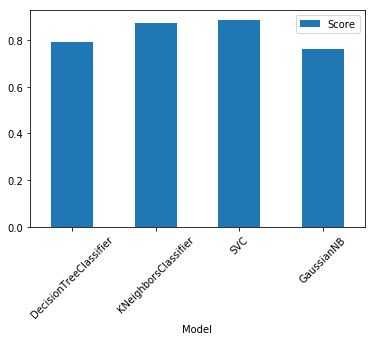

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = score_df.plot.bar()
ax.set_xticklabels(score_df.index, rotation=45, fontsize=10)

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

selector = GridSearchCV(SVC(), parameters, scoring='accuracy') # we only care about accuracy here
selector.fit(X, y)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in v

Best parameter set found:
{'C': 100, 'kernel': 'sigmoid'}
Detailed grid scores:
0.927 (+/-0.098) for {'C': 100, 'kernel': 'linear'}

0.925 (+/-0.095) for {'C': 100, 'kernel': 'rbf'}

0.915 (+/-0.105) for {'C': 100, 'kernel': 'poly'}

0.931 (+/-0.090) for {'C': 100, 'kernel': 'sigmoid'}

0.927 (+/-0.098) for {'C': 50, 'kernel': 'linear'}

0.926 (+/-0.092) for {'C': 50, 'kernel': 'rbf'}

0.905 (+/-0.097) for {'C': 50, 'kernel': 'poly'}

0.929 (+/-0.092) for {'C': 50, 'kernel': 'sigmoid'}

0.927 (+/-0.098) for {'C': 20, 'kernel': 'linear'}

0.927 (+/-0.089) for {'C': 20, 'kernel': 'rbf'}

0.900 (+/-0.090) for {'C': 20, 'kernel': 'poly'}

0.918 (+/-0.102) for {'C': 20, 'kernel': 'sigmoid'}

0.927 (+/-0.098) for {'C': 1, 'kernel': 'linear'}

0.859 (+/-0.097) for {'C': 1, 'kernel': 'rbf'}

0.604 (+/-0.043) for {'C': 1, 'kernel': 'poly'}

0.762 (+/-0.042) for {'C': 1, 'kernel': 'sigmoid'}

0.927 (+/-0.095) for {'C': 0.1, 'kernel': 'linear'}

0.398 (+/-0.028) for {'C': 0.1, 'kernel': 'rbf'}

0

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
clf = SVC(kernel='linear', C=1).fit(X, y)
y_pred = clf.predict(X_test)
print('Test Accuracy score:', accuracy_score(y_test, y_pred))

Test Accuracy score: 0.8918918918918919


### This marks the end of detailed analysis of our classification techniques alongwith feature selection.